# **COVID-19 Sentiment Analysis (INDIA)**
**Context :**

This dataset contains the Tweets of users who have applied the following hashtags: #coronavirus, #coronavirusoutbreak, #coronavirusPandemic, #covid19, #covid_19, #epitwitter, #ihavecorona, etc.

The tweets have been extracted with the help of 'snscrape'.

From about January 2020 till December 2020, the dataset also included the following additional hashtags: #StayHomeStaySafe, #TestTraceIsolate, etc.


**Content :**

The dataset contains variables associated with Twitter and other Social Media platform: the text of various tweets and the accounts that tweeted them, the hashtags used.


**Acknowledgements :**

This dataset would not be possible without the creators of the 'Snscrape' package, JustAnotherArchivist.

**Made by :**
1. Vedaant Singh (1830207) 
2. Vedant Tibrewal (1830208)
3. Twinkle Sinha (1830142)
4. Chetna Verma (1830169)
5. Yash Raj Singh (1830212)

### **Imporing the Libraries**

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## **Merging all the 21 datasets together**

In [3]:
tweets = []
for dirname, _, filenames in os.walk('D:\\ML Python\\Covid_19_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename), index_col = None, header = 0)
        row, cols = df.shape
        tweets.append(df)
        
data = pd.concat(tweets, axis=0, ignore_index=True)
del tweets

# random samples of tweets 
print("\n")
print(data.Text.sample(5))

# print columns of dataframe
# print(tweets_en_US.columns)

# drop columns with user sensitive information 
data_set = data.copy()

print("\n")
print(data_set.columns)

D:\ML Python\Covid_19_dataset\covid19-0.csv
D:\ML Python\Covid_19_dataset\covid19-1.csv
D:\ML Python\Covid_19_dataset\covid19-10.csv
D:\ML Python\Covid_19_dataset\covid19-11.csv
D:\ML Python\Covid_19_dataset\covid19-12.csv
D:\ML Python\Covid_19_dataset\covid19-13.csv
D:\ML Python\Covid_19_dataset\covid19-14.csv
D:\ML Python\Covid_19_dataset\covid19-15.csv
D:\ML Python\Covid_19_dataset\covid19-16.csv
D:\ML Python\Covid_19_dataset\covid19-17.csv
D:\ML Python\Covid_19_dataset\covid19-18.csv
D:\ML Python\Covid_19_dataset\covid19-19.csv
D:\ML Python\Covid_19_dataset\covid19-2.csv
D:\ML Python\Covid_19_dataset\covid19-20.csv
D:\ML Python\Covid_19_dataset\covid19-3.csv
D:\ML Python\Covid_19_dataset\covid19-4.csv
D:\ML Python\Covid_19_dataset\covid19-5.csv
D:\ML Python\Covid_19_dataset\covid19-6.csv
D:\ML Python\Covid_19_dataset\covid19-7.csv
D:\ML Python\Covid_19_dataset\covid19-8.csv
D:\ML Python\Covid_19_dataset\covid19-9.csv


83957     காங். எம்.பி வசந்தகுமார் காலமானார்..! \nஓம் சா...
155

## **Data Wrangling**

In [4]:
data_set.head()

,Datetime,Tweet Id,Text,Username
0,2020-12-30 23:50:00+00:00,1344430567253704707,"#RepublicDay parade to be shorter, with fewer ...",htTweets
1,2020-12-30 23:30:10+00:00,1344425576564666369,Researchers at the University of Miami have re...,GreatGameIndia
2,2020-12-30 23:30:06+00:00,1344425561519779842,"The organization called 'Bavar,' or 'Belief' i...",NewIndianXpress
3,2020-12-30 23:21:00+00:00,1344423269143756800,"सुपरजंबो विमानों पर पड़ी कोरोना वायरस की मार, ...",AmarUjalaNews
4,2020-12-30 23:20:34+00:00,1344423163099140097,Can anybody explain Why now travellers from UK...,Dakshamehta033


In [ ]:
data_set.shape

(572521, 4)

In [ ]:
data_set.describe()

,Datetime,Tweet Id,Text,Username
count,572521,572521,572521,572521
unique,420874,432771,429926,117611
top,2020-04-13 10:49:48+00:00,1276070809404977152,We stand by Italy during these trying times. S...,rajeshkshitij
freq,8,6,248,7002


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572521 entries, 0 to 572520
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  572521 non-null  object
 1   Tweet Id  572521 non-null  object
 2   Text      572521 non-null  object
 3   Username  572521 non-null  object
dtypes: object(4)
memory usage: 17.5+ MB


In [ ]:
data_set.isnull().sum()

Datetime    0
Tweet Id    0
Text        0
Username    0
dtype: int64

In [5]:
dataset = pd.DataFrame({ "Date_of_tweet": data_set['Datetime'], "Country_code": 'IN', "Username": data_set['Username'], "TweetID": data_set['Tweet Id'], 
                        "Text": data_set['Text'], "Text_length": data_set['Text'].apply(len)})

dataset

,Date_of_tweet,Country_code,Username,TweetID,Text,Text_length
0,2020-12-30 23:50:00+00:00,IN,htTweets,1344430567253704707,"#RepublicDay parade to be shorter, with fewer ...",132
1,2020-12-30 23:30:10+00:00,IN,GreatGameIndia,1344425576564666369,Researchers at the University of Miami have re...,247
2,2020-12-30 23:30:06+00:00,IN,NewIndianXpress,1344425561519779842,"The organization called 'Bavar,' or 'Belief' i...",248
3,2020-12-30 23:21:00+00:00,IN,AmarUjalaNews,1344423269143756800,"सुपरजंबो विमानों पर पड़ी कोरोना वायरस की मार, ...",142
4,2020-12-30 23:20:34+00:00,IN,Dakshamehta033,1344423163099140097,Can anybody explain Why now travellers from UK...,303
...,...,...,...,...,...,...
572516,2020-06-01 02:13:28+00:00,IN,Jagadgururaghav,1267278057125093378,#jagadguru #lockdown #socialdistancing #covid1...,185
572517,2020-06-01 01:47:10+00:00,IN,Saadon_Aksah,1267271437540179969,Going out since the #lockdown has been eased!\...,70
572518,2020-06-01 01:38:57+00:00,IN,Ekendra,1267269371195297793,Day 70 of #COVID19 #lockdown in #Nepal. Good m...,287
572519,2020-06-01 01:05:52+00:00,IN,JaggaJeevan,1267261045350989826,@tinkerbell9958 @Chutkla This exactly may play...,326


## **Exploratory Data Analysis - I (Without including the Sentiment Column)**

#### **Tweets per Day**

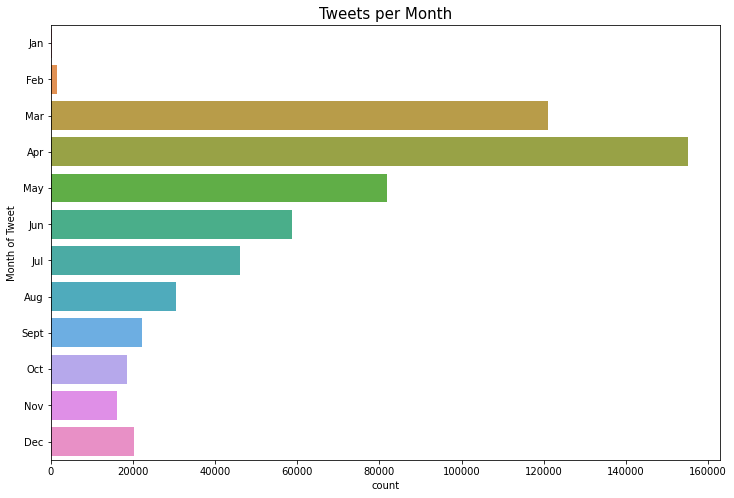

In [ ]:
import datetime
dataset['Date_of_tweet'] = pd.to_datetime(dataset['Date_of_tweet']).dt.month
dataset.sort_values('Date_of_tweet', inplace = True)
dataset['Date_of_tweet'] = dataset['Date_of_tweet'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                                            ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

plt.figure(figsize = (12, 8))
sns.countplot(y = dataset['Date_of_tweet'][:len(dataset),], data = dataset)
plt.title("Tweets per Month", fontdict = {'fontsize' : 15})
plt.ylabel('Month of Tweet')
plt.show()

**Most number of Tweets were made in the month of April, 2020**

**Least number of tweets were made in the month of January 2020**

In [ ]:
dataset

,Date_of_tweet,Country_code,Username,TweetID,Text,Text_length
294926,Jan,IN,SakalMediaNews,1221028740299284481,2 people who have returned from #China are und...,258
294722,Jan,IN,MaslahDr,1223001266298793984,@hodansomali Aamiin. Really we can't manage an...,291
294723,Jan,IN,DaOverwatch,1222998458480627715,Chinese Medical staff on the front line to fig...,183
294724,Jan,IN,Doulatkhan_,1222992180580581382,corona virus has been declared an internationa...,94
294725,Jan,IN,aliihdr,1222981101813141505,here we go World second largest Economy will f...,273
...,...,...,...,...,...,...
196549,Dec,IN,mohit_revalia,1340629787660886016,#Worldincorona #Covid_19 #COVIDIOTS #coronavi...,153
196550,Dec,IN,jariyahinwiset,1340624383304376320,ตอนนี้ซื้อสมุดเล่มที่ 2 มาจดชื่อซีรีส์และเรียง...,171
196551,Dec,IN,Chacocola,1340622962525839371,ฉันใส่ แมวมา1 ปี ป้องกันคัวเองทุกอย่าง เพื่อมา...,150
196544,Dec,IN,patcharliehotm2,1340639805672079360,ศก.แบบนี้ ฝีมือศก.แบบนี้ ยังมีหน้ามาขอประชาชนใ...,192


#### **Pair Plot to find relation between the features**

<Figure size 1440x1440 with 0 Axes>

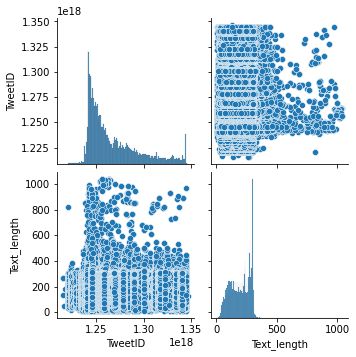

In [ ]:
plt.figure(figsize = (20, 20))
sns.pairplot(dataset)
plt.show()

#### **Most Mentions on Twitter**

In [ ]:
mention = []
for i in range(0, 572521):
  review1 = dataset['Text'][i]
  review1 = re.findall('@[a-zA-Z0-9_]+', review1)
  for j in review1:
    mention.append(j)

mention

['@SecyChief',
 '@HFWOdisha',
 '@MoHFW_India',
 '@IPR_Odisha',
 '@UNESCO',
 '@UNinHindi',
 '@UN',
 '@Atul_Gawande',
 '@reemarkabl',
 '@reemalokesh',
 '@YouTube',
 '@AspeeNutan',
 '@DrRPNishank',
 '@drswapnapatker',
 '@JanviChitalia',
 '@BNI_official_pg',
 '@EduMinOfIndia',
 '@everythinstudnt',
 '@business',
 '@Newsweek',
 '@nsitharaman',
 '@DasShaktikanta',
 '@narendramodi',
 '@AmitShah',
 '@nsitharaman',
 '@DasShaktikanta',
 '@narendramodi',
 '@AmitShah',
 '@nsitharaman',
 '@DasShaktikanta',
 '@narendramodi',
 '@AmitShah',
 '@nsitharaman',
 '@DasShaktikanta',
 '@narendramodi',
 '@AmitShah',
 '@nsitharaman',
 '@DasShaktikanta',
 '@narendramodi',
 '@AmitShah',
 '@nsitharaman',
 '@DasShaktikanta',
 '@narendramodi',
 '@AmitShah',
 '@nsitharaman',
 '@DasShaktikanta',
 '@narendramodi',
 '@AmitShah',
 '@nsitharaman',
 '@DasShaktikanta',
 '@Amitshah',
 '@narendramodi',
 '@nsitharaman',
 '@DasShaktikanta',
 '@narendramodi',
 '@nsitharaman',
 '@DasShaktikanta',
 '@narendramodi',
 '@nsitharaman'

In [ ]:
df = pd.DataFrame(mention)
df = df[0].value_counts()

from nltk.probability import FreqDist
freqdist = FreqDist()

for words in df:
  freqdist[words] += 1

freqdist

FreqDist({1: 39014,
          2: 17730,
          3: 6140,
          4: 3734,
          5: 2017,
          6: 1669,
          7: 1075,
          8: 906,
          9: 742,
          10: 579,
          11: 462,
          12: 450,
          13: 318,
          14: 347,
          15: 272,
          16: 231,
          17: 212,
          18: 191,
          19: 163,
          20: 168,
          21: 185,
          22: 117,
          23: 132,
          24: 101,
          25: 105,
          26: 86,
          27: 103,
          28: 87,
          29: 79,
          30: 86,
          31: 72,
          32: 61,
          33: 59,
          34: 56,
          35: 55,
          36: 37,
          37: 47,
          38: 47,
          39: 43,
          40: 38,
          41: 38,
          42: 33,
          43: 32,
          44: 28,
          45: 25,
          46: 30,
          47: 15,
          48: 34,
          49: 20,
          50: 25,
          51: 25,
          52: 25,
          53: 16,
          54: 18,
  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


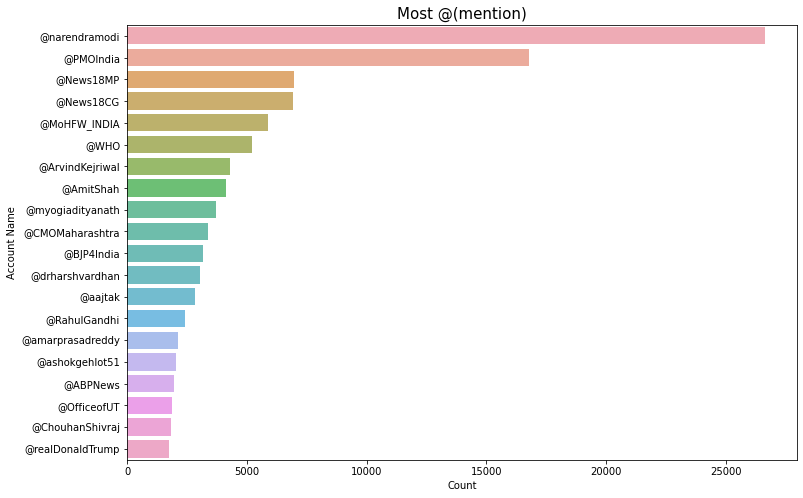

In [ ]:
df = df[:20, ]
plt.figure(figsize = (12, 8))
sns.barplot(df.values, df.index, alpha = 0.8)
plt.title("Most @(mention)", fontdict = {'fontsize' : 15})
plt.ylabel("Account Name")
plt.xlabel("Count")
plt.show()

**Most mentioned twitter account : @narendramodi**

#### **Top Hashtags Used**

In [ ]:
hashtags = []
for i in range(0, 572521):
  review = dataset['Text'][i]
  review = re.findall('#[a-zA-Z0-9_]+', review)
  for j in review:
    hashtags.append(j)
    
hashtags

['#RepublicDay',
 '#Covid19',
 '#COVID19',
 '#vaccine',
 '#COVID19',
 '#covid19',
 '#SuperJumboPlanes',
 '#Coronavirus',
 '#NewStrainCovid19',
 '#lapses',
 '#corona',
 '#covid19',
 '#Odisha',
 '#OdishaNews',
 '#OdishaGovernment',
 '#Covid19',
 '#CovidPandemic',
 '#UnlockGuidelines',
 '#CinemaHalls',
 '#AsitKumarTripathy',
 '#Dinalipi',
 '#Odisha',
 '#Covid19',
 '#CovidPandemic',
 '#COVID19Cases',
 '#Covid19Tally',
 '#Covid19Update',
 '#OdishaFightsCorona',
 '#Dinalipi',
 '#COVID19',
 '#COVID19',
 '#COVID19',
 '#speaker',
 '#COVID19',
 '#PCRGATE',
 '#COVID19',
 '#God',
 '#COVID19',
 '#Godsaveus',
 '#COVIDIOT',
 '#ChineseVirus',
 '#COVID19Vic',
 '#Covid',
 '#COVID19',
 '#PMCBankCrisis',
 '#pmcbank',
 '#COVID19',
 '#PMCBankCrisis',
 '#pmcbank',
 '#COVID19',
 '#Covid19',
 '#PMCBankCrisis',
 '#pmcbank',
 '#COVID19',
 '#PMCBankCrisis',
 '#pmcbank',
 '#COVID19',
 '#PMCBankCrisis',
 '#pmcbank',
 '#COVID19',
 '#PMCBankCrisis',
 '#pmcbank',
 '#COVID19',
 '#PMCBankCrisis',
 '#pmcbank',
 '#COVID19

In [ ]:
df1 = pd.DataFrame(hashtags)
df1 = df1[0].value_counts()

from nltk.probability import FreqDist
freqdist1 = FreqDist()

for words in df:
  freqdist1[words] += 1

freqdist1

FreqDist({1755: 1,
          1824: 1,
          1869: 1,
          1941: 1,
          2040: 1,
          2116: 1,
          2437: 1,
          2846: 1,
          3051: 1,
          3154: 1,
          3393: 1,
          3719: 1,
          4116: 1,
          4279: 1,
          5211: 1,
          5867: 1,
          6915: 1,
          6974: 1,
          16770: 1,
          26623: 1})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


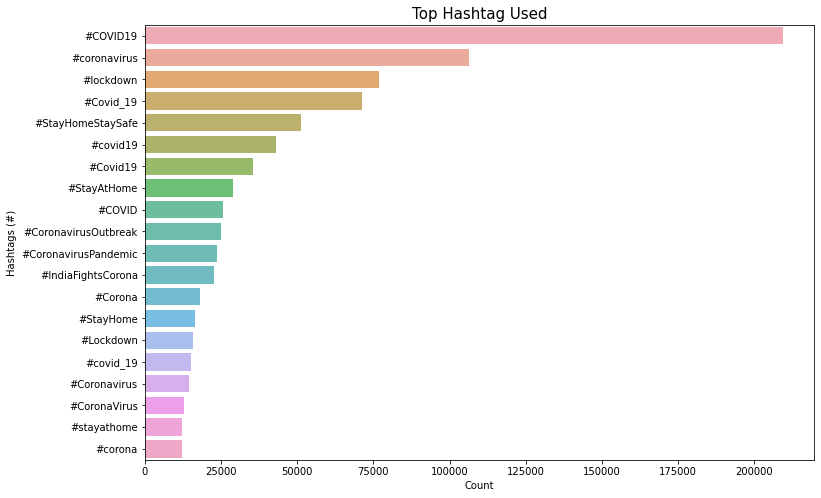

In [ ]:
df1 = df1[:20, ]
plt.figure(figsize = (12, 8))
sns.barplot(df1.values, df1.index, alpha = 0.8)
plt.title("Top Hashtag Used", fontdict = {'fontsize' : 15})
plt.ylabel("Hashtags (#)")
plt.xlabel("Count")
plt.show()

**Most used hashtag : #COVID19**

## **Data Cleaning**

#### **Applying Sentiments on these tweets**

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more

In [6]:
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

dataset['sentiment'] = ' '
dataset['polarity'] = None
for i,j in enumerate(dataset.Text):
  blob = TextBlob(j)
  dataset['polarity'][i] = blob.sentiment.polarity
  if blob.sentiment.polarity > 0 :
    dataset['sentiment'][i] = 'positive'
  elif blob.sentiment.polarity == 0 :
    dataset['sentiment'][i] = 'neutral'
  else:
    dataset['sentiment'][i] = 'negative'

dataset

,Date_of_tweet,Country_code,Username,TweetID,Text,Text_length,sentiment,polarity
0,2020-12-30 23:50:00+00:00,IN,htTweets,1344430567253704707,"#RepublicDay parade to be shorter, with fewer ...",132,negative,-0.187500
1,2020-12-30 23:30:10+00:00,IN,GreatGameIndia,1344425576564666369,Researchers at the University of Miami have re...,247,neutral,0.000000
2,2020-12-30 23:30:06+00:00,IN,NewIndianXpress,1344425561519779842,"The organization called 'Bavar,' or 'Belief' i...",248,neutral,0.000000
3,2020-12-30 23:21:00+00:00,IN,AmarUjalaNews,1344423269143756800,"सुपरजंबो विमानों पर पड़ी कोरोना वायरस की मार, ...",142,neutral,0.000000
4,2020-12-30 23:20:34+00:00,IN,Dakshamehta033,1344423163099140097,Can anybody explain Why now travellers from UK...,303,positive,0.095455
...,...,...,...,...,...,...,...,...
572516,2020-06-01 02:13:28+00:00,IN,Jagadgururaghav,1267278057125093378,#jagadguru #lockdown #socialdistancing #covid1...,185,neutral,0.000000
572517,2020-06-01 01:47:10+00:00,IN,Saadon_Aksah,1267271437540179969,Going out since the #lockdown has been eased!\...,70,neutral,0.000000
572518,2020-06-01 01:38:57+00:00,IN,Ekendra,1267269371195297793,Day 70 of #COVID19 #lockdown in #Nepal. Good m...,287,positive,0.350000
572519,2020-06-01 01:05:52+00:00,IN,JaggaJeevan,1267261045350989826,@tinkerbell9958 @Chutkla This exactly may play...,326,positive,0.350000


In [1]:
# import plotly.express as px
# fig = px.pie(data_frame = dataset, names = 'sentiment', title = 'Sentiment', hole = 0.2)
# fig.show()

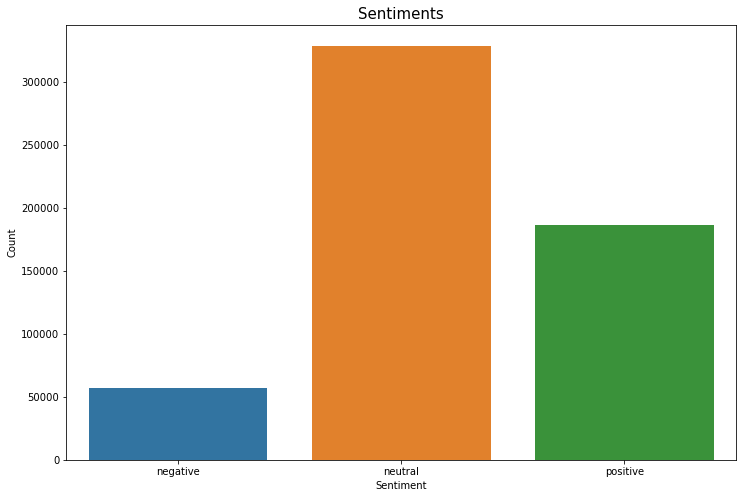

In [8]:
plt.figure(figsize = (12, 8))
sns.countplot(x = dataset['sentiment'], data = dataset)
plt.title("Sentiments", fontdict = {'fontsize' : 15})
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
dataset['sentiment'] = labelEncoder_X.fit_transform(dataset['sentiment'])
dataset.head(5)

,Date_of_tweet,Country_code,Username,TweetID,Text,Text_length,sentiment,polarity
0,2020-12-30 23:50:00+00:00,IN,htTweets,1344430567253704707,"#RepublicDay parade to be shorter, with fewer ...",132,0,-0.187500
1,2020-12-30 23:30:10+00:00,IN,GreatGameIndia,1344425576564666369,Researchers at the University of Miami have re...,247,1,0.000000
2,2020-12-30 23:30:06+00:00,IN,NewIndianXpress,1344425561519779842,"The organization called 'Bavar,' or 'Belief' i...",248,1,0.000000
3,2020-12-30 23:21:00+00:00,IN,AmarUjalaNews,1344423269143756800,"सुपरजंबो विमानों पर पड़ी कोरोना वायरस की मार, ...",142,1,0.000000
4,2020-12-30 23:20:34+00:00,IN,Dakshamehta033,1344423163099140097,Can anybody explain Why now travellers from UK...,303,2,0.095455


### **Creating Corpus**

In [17]:
corpus = []
words = []
cloud = []
ps = PorterStemmer()
for i in range(0, 572521):
  review2 = dataset['Text'][i]
  review2 = re.sub('"', ' ', review2)
  review2 = re.sub('https://[a-zA-Z0-9./]+', ' ',review2)
  review2 = re.sub('#[a-zA-Z0-9._]+', ' ', review2)
  review2 = re.sub('@[a-zA-Z0-9._]+', ' ', review2)
  review2 = re.sub('\n', ' ', review2)
  review2 = re.sub('&amp', ' ', review2)
  review2 = re.sub('[^a-zA-Z]', ' ', review2)
  review2 = review2.lower()
  review2 = review2.split()
  review2 = [word for word in review2 if not word in stopwords.words('english')]
  for j in review2:
    words.append(j)
    cloud.append(' '.join(j))
  review2 = [ps.stem(word) for word in review2]
  review2 = ' '.join(review2)
  corpus.append(review2)
corpus

['parad shorter fewer spectat due protocol',
 'research univers miami recommend men fertil evalu receiv consid freez sperm vaccin order protect fertil',
 'organ call bavar belief farsi form allow women look work make handicraft donat sew machin gave widow other way earn cash amid pandem',
 '',
 'anybodi explain travel uk novemb n decemb r search trace thr secur test covid airport tht new strain requir differ test normal rtpcr test trace',
 'odisha allow cinema hall reopen per cent capac',
 'odisha report new covid case fresh fatal',
 'gujarat diamond industri surat see jump sale polish stone post lockdown indian diamond industri start nov worth sale jump almost last year reason slow reopen market christma say trader',
 '',
 'major case mumbai delhi chennai kerala primari care physician mumbai know fever case r reduc inspit diwali wed season xma possibl herd immun better social distanc mask complianc',
 'aspe nutan academi present caregiv confid builder power via fabul',
 'test unreli',

In [27]:
len(words)

4616717

In [22]:
df2 = pd.DataFrame(words)
df2 = df2[0].value_counts()

from nltk.probability import FreqDist
freqdist2 = FreqDist()

for word_ in df2:
  freqdist2[word_] += 1

freqdist2

FreqDist({1: 52372, 2: 24930, 3: 9839, 4: 6455, 5: 3964, 6: 3118, 7: 2404, 8: 2015, 9: 1526, 10: 1398, ...})

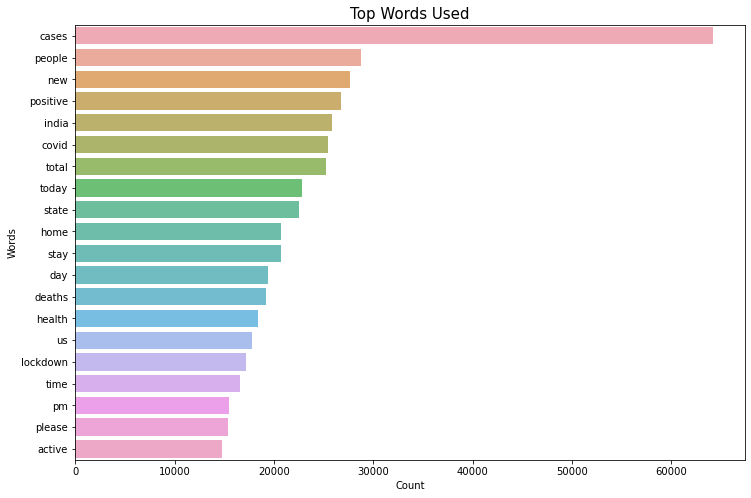

In [23]:
df2 = df2[:20, ]
plt.figure(figsize = (12, 8))
sns.barplot(df2.values, df2.index, alpha = 0.8)
plt.title("Top Words Used", fontdict = {'fontsize' : 15})
plt.ylabel("Words")
plt.xlabel("Count")
plt.show()

## **Using Tfidf Vectorizer**
## **Splitting the Dataset into Training and Test Set**

In [24]:
dataset_final = pd.DataFrame(corpus, columns = ['Content'])  # To convert a List into a DataFrame
dataset_final = pd.concat([dataset['sentiment'], dataset_final], axis = 1)
dataset_final

,sentiment,Content
0,0,parad shorter fewer spectat due protocol
1,1,research univers miami recommend men fertil ev...
2,1,organ call bavar belief farsi form allow women...
3,1,
4,2,anybodi explain travel uk novemb n decemb r se...
...,...,...
572516,1,jagadguru swami raghav devacharya ji
572517,1,go sinc eas
572518,2,day good morn greeni june admist ongo debat wh...
572519,2,exactli may play restrict taken owner replan o...


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 3, max_df = 0.9, max_features = 3600000)
# max_df is used for removing terms that appear too frequently
# max_df = 0.90 means "ignore terms that appear in more than 90% of the documents".
# min_df is used for removing terms that appear too infrequently
# min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".

X = vectorizer.fit_transform(dataset_final.Content)
y = dataset_final.iloc[:, 0].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## **Classification Models**

#### **Logistic Regression**

Accuracy of Logistic Regression is: 90.00146718740176%
              precision    recall  f1-score   support

           0       0.82      0.67      0.74     14266
           1       0.91      0.97      0.94     82575
           2       0.90      0.85      0.88     46290

    accuracy                           0.90    143131
   macro avg       0.88      0.83      0.85    143131
weighted avg       0.90      0.90      0.90    143131



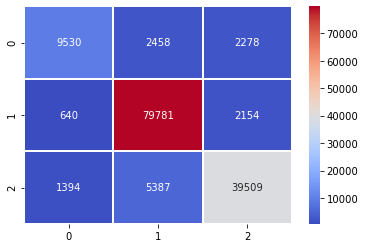

In [30]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(max_iter = 300)
classifier_log.fit(X_train, Y_train)

Y_pred_log = classifier_log.predict(X_test)

print("Accuracy of Logistic Regression is: {}%".format(accuracy_score(Y_test, Y_pred_log) * 100))
# print("Confusion Matrix of Logistic Regression is: \n{}".format(confusion_matrix(Y_test, Y_pred_log)))
sns.heatmap(confusion_matrix(Y_test, Y_pred_log), linecolor = 'white', linewidths = 1, cmap = 'coolwarm', annot = True, fmt='g')
print("{}".format(classification_report(Y_test, Y_pred_log)))

#### **Multinomial Naive Bayes**

Accuracy of MultinomialNB is: 81.92285388909461%
              precision    recall  f1-score   support

           0       0.89      0.20      0.32     14266
           1       0.86      0.93      0.89     82575
           2       0.74      0.82      0.78     46290

    accuracy                           0.82    143131
   macro avg       0.83      0.65      0.66    143131
weighted avg       0.83      0.82      0.80    143131



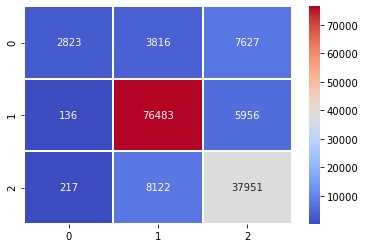

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier_mnb = MultinomialNB()
classifier_mnb.fit(X_train, Y_train)

Y_pred_mnb = classifier_mnb.predict(X_test)

print("Accuracy of MultinomialNB is: {}%".format(accuracy_score(Y_test, Y_pred_mnb) * 100))
# print("Confusion Matrix of MultinomialNB is: \n{}".format(confusion_matrix(Y_test, Y_pred_mnb)))
sns.heatmap(confusion_matrix(Y_test, Y_pred_mnb), linecolor = 'white', linewidths = 1, cmap = 'coolwarm', annot = True, fmt='g')
print("{}".format(classification_report(Y_test, Y_pred_mnb)))

#### **Decision Tree**

Accuracy of Decision tree Classifier is: 89.87291362458167%
              precision    recall  f1-score   support

           0       0.76      0.70      0.73     14266
           1       0.92      0.95      0.94     82575
           2       0.89      0.86      0.88     46290

    accuracy                           0.90    143131
   macro avg       0.86      0.84      0.85    143131
weighted avg       0.90      0.90      0.90    143131



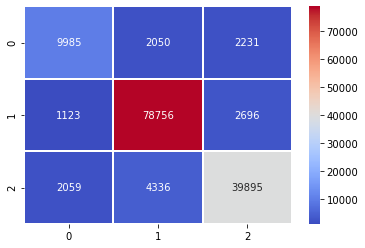

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy')
classifier_dt.fit(X_train, Y_train)

Y_pred_dt = classifier_dt.predict(X_test)

print("Accuracy of Decision tree Classifier is: {}%".format(accuracy_score(Y_test, Y_pred_dt) * 100))
# print("Confusion Matrix of Decision tree Classifier is: \n{}".format(confusion_matrix(Y_test, Y_pred_dt)))
sns.heatmap(confusion_matrix(Y_test, Y_pred_dt), linecolor = 'white', linewidths = 1, cmap = 'coolwarm', annot = True, fmt='g')
print("{}".format(classification_report(Y_test, Y_pred_dt)))

#### **Random Forest**

Accuracy of Random Forest Classifier is: 91.28840013693748%
              precision    recall  f1-score   support

           0       0.94      0.61      0.74     14266
           1       0.93      0.97      0.95     82575
           2       0.88      0.91      0.89     46290

    accuracy                           0.91    143131
   macro avg       0.91      0.83      0.86    143131
weighted avg       0.91      0.91      0.91    143131



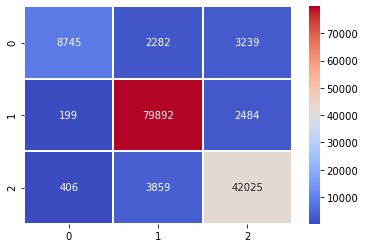

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
classifier_rf.fit(X_train, Y_train)

Y_pred_rf = classifier_rf.predict(X_test)

print("Accuracy of Random Forest Classifier is: {}%".format(accuracy_score(Y_test, Y_pred_rf) * 100))
# print("Confusion Matrix of Random Forest Classifier is: \n{}".format(confusion_matrix(Y_test, Y_pred_rf)))
sns.heatmap(confusion_matrix(Y_test, Y_pred_rf), linecolor = 'white', linewidths = 1, cmap = 'coolwarm', annot = True, fmt='g')
print("{}".format(classification_report(Y_test, Y_pred_rf)))

#### **XG Boost Classifier**

[00:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost Classifier is: 86.84491829163493%
              precision    recall  f1-score   support

           0       0.83      0.52      0.64     14266
           1       0.86      0.98      0.91     82575
           2       0.91      0.78      0.84     46290

    accuracy                           0.87    143131
   macro avg       0.86      0.76      0.80    143131
weighted avg       0.87      0.87      0.86    143131



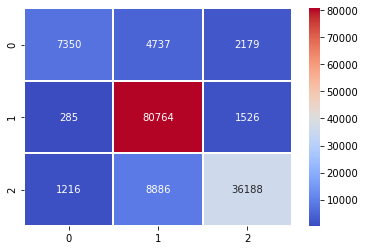

In [32]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, Y_train)

Y_pred_xg = classifier_xg.predict(X_test)

print("Accuracy of XGBoost Classifier is: {}%".format(accuracy_score(Y_test, Y_pred_xg) * 100))
# print("Confusion Matrix of XGBoost Classifier is: \n{}".format(confusion_matrix(Y_test, Y_pred_xg)))
sns.heatmap(confusion_matrix(Y_test, Y_pred_xg), linecolor = 'white', linewidths = 1, cmap = 'coolwarm', annot = True, fmt='g')
print("{}".format(classification_report(Y_test, Y_pred_xg)))

#### **Sochastic Gradient Descent Classifier (SGD)**

Accuracy of Sochastic Gradient Descent Classifier is: 85.09337599821143%
              precision    recall  f1-score   support

           0       0.85      0.36      0.50     14266
           1       0.84      0.97      0.90     82575
           2       0.87      0.79      0.83     46290

    accuracy                           0.85    143131
   macro avg       0.85      0.70      0.74    143131
weighted avg       0.85      0.85      0.84    143131



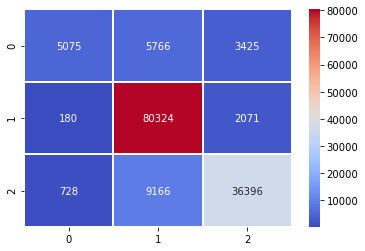

In [33]:
from sklearn.linear_model import SGDClassifier
classifier_sgd = SGDClassifier()
classifier_sgd.fit(X_train, Y_train)

Y_pred_sgd = classifier_sgd.predict(X_test)

print("Accuracy of Sochastic Gradient Descent Classifier is: {}%".format(accuracy_score(Y_test, Y_pred_sgd) * 100))
# print("Confusion Matrix of Sochastic Gradient Descent Classifier is: \n{}".format(confusion_matrix(Y_test, Y_pred_sgd)))
sns.heatmap(confusion_matrix(Y_test, Y_pred_sgd), linecolor = 'white', linewidths = 1, cmap = 'coolwarm', annot = True, fmt='g')
print("{}".format(classification_report(Y_test, Y_pred_sgd)))

## **Exploratory Data Analysis - II (Including the Sentiment Column)**

In [93]:
# from sklearn.model_selection import learning_curve
# train_sizes, train_scores, validation_scores = learning_curve(
# estimator = LogisticRegression(),
# X = X_train, y = Y_train, train_sizes = [100, 1000, 1500], cv = 5, 
# shuffle = True, random_state = 0)

In [2]:
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(validation_scores, axis=1)
# test_scores_std = np.std(validation_scores, axis=1)
# plt.figure()
# plt.title("Logistic Regression")
# plt.legend(loc="best")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g")
# plt.show()

#### **HeatMap to check the Correlation (if any)**

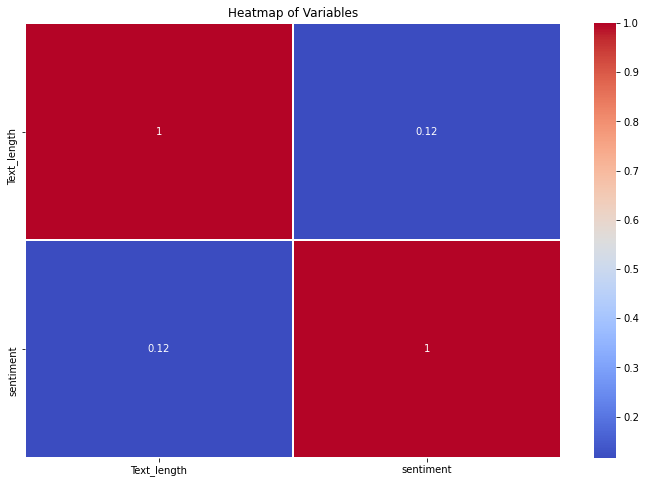

In [10]:
plt.figure(figsize = (12, 8))
dataset_cor_1 = dataset.corr()
axes1 = sns.heatmap(dataset_cor_1, linecolor = 'white', linewidths = 1, cmap = 'coolwarm', annot = True)
axes1.set_title("Heatmap of Variables")
plt.show()

#### **Pair Plot to find relation between the features**

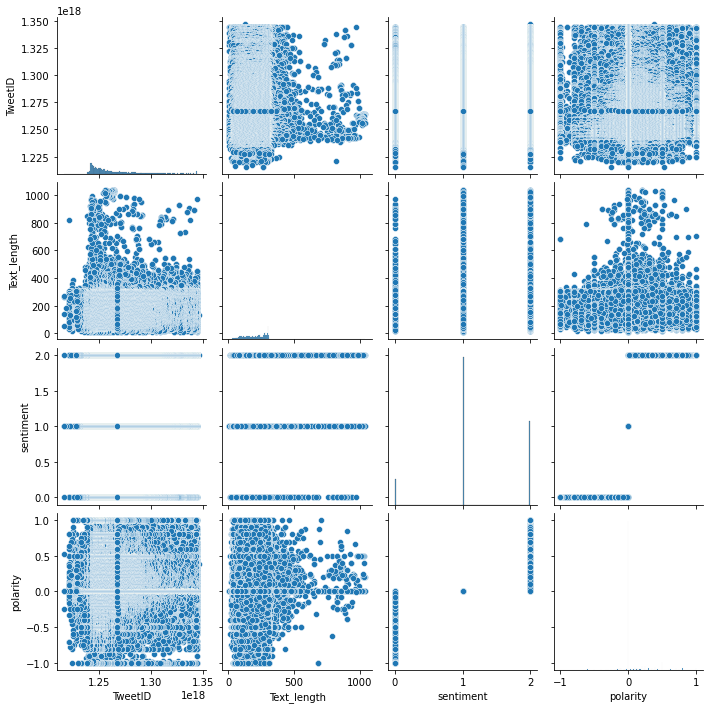

In [11]:
sns.pairplot(dataset)
plt.show()

#### **Month vs. Sentiment**

In [ ]:
# plt.figure(figsize = (45, 10))
# sns.countplot(x = dataset['Date_of_tweet'], hue = dataset['sentiment'], data = dataset)
# plt.show()

#### **Word Cloud**

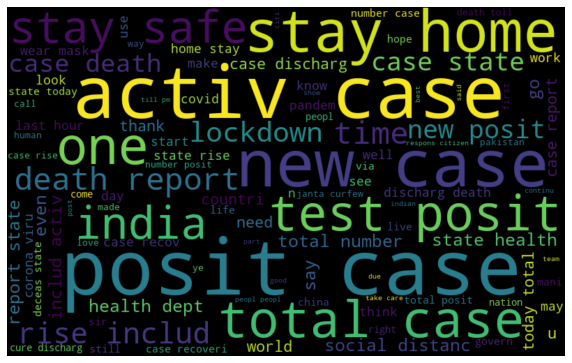

In [115]:
all_words = ' '.join([text for text in dataset_final['Content']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, max_words = 100).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Conclusion**

#### **What is COVID-19?**

COVID-19 is a disease that is caused by the SARS-CoV-2 virus. In 2020 there was a global COVID-19 pandemic.
Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. 

The virus that causes COVID-19 is mainly transmitted through droplets generated when an infected person coughs, sneezes, or exhales. These droplets are too heavy to hang in the air, and quickly fall on floors or surfaces.
You can be infected by breathing in the virus if you are within close proximity of someone who has COVID-19, or by touching a contaminated surface and then your eyes, nose or mouth.

#### **Steps invloved:**

***Step 1:*** We merged all the 21 datasets with the help of the 'os' library.

***Step 2:*** We did some Data Wrangling, and obtained some vital informations about  the COVID-19 Dataset

***Step 3:*** We did some Exploratory Data Analysis to gain some additional insights about the Dataset

***Step 4:*** We used 'TextBlob' to create the 'Sentiment' column, which primarily stored the sentiment of people based on their tweets.

(0 - Negative, 1 - Neutral, 2 - Positive)

***Step 5:*** Data Cleaning, i.e got rid of all the extras(https, #, @, Numeric values ,etc.) and kept only the necessary words, we used Regex to do so. 
We also used Porter Stemmer to stem the words.

***Step 6:*** We used Tfidf Vectorizer to vectorize all the words.

***Step 7:*** Finally, we applied the vectorized training and test sets to various classification models. 

#### **Results:**

We trained our Model on various Machine Learning Algorithms, the results of which are attached below.

1) Accuracy of **Logistic Regression** is: **90.001%**

2) Accuracy of **MultinomialNB** is: **81.922%**

3) Accuracy of **Decision Tree** is: **89.872%**

4) Accuracy of **Random Forest** is: **91.288%**

5) Accuracy of **XG Boost** is: **86.844**

6) Accuracy of **SGD Classifier** is: **85.093%**
